In [1]:


!wget --no-check-certificate -O dailymilesque_stats.csv \
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv'

!wget --no-check-certificate -O running_data.csv \
    'https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=291786965&single=true&output=csv'

%ls    

--2021-04-11 09:40:31--  https://docs.google.com/spreadsheets/d/e/2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc/pub?gid=170553600&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 172.217.2.142, 2607:f8b0:4008:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.142|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-bk-sheets.googleusercontent.com/pub/l5l039s6ni5uumqbsj9o11lmdc/buu7lbu6p6dleficenct2cur1k/1618155630000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=true&output=csv [following]
--2021-04-11 09:40:31--  https://doc-0c-bk-sheets.googleusercontent.com/pub/l5l039s6ni5uumqbsj9o11lmdc/buu7lbu6p6dleficenct2cur1k/1618155630000/114871121160870939545/*/e@2PACX-1vTLPCB2D8_CdN4vCOS1VWLFspDh8uT6Rq4EzLW0e1JIhxUfgJqK5dsdrL7F3VLyrxXhhgNLNNzeSerc?gid=170553600&single=true&o

In [2]:
# https://calplot.readthedocs.io/en/latest/
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import pandas as pd
import calplot
import datetime

csv2read = "./running_data.csv"
dm_df = pd.read_csv(csv2read)
#xlsx2read = "~/Drive/IFTTT/runningData.xlsx"
#dm_df = pd.read_excel(xlsx2read)
dm_df.tail()

,fuente,date,distance (m),time (s),distance (km),~energy (kcal),time (h:mm:ss),pace (min/km),climb (m),url
0,strava,2021-03-29,3130.0,1293,3.13,292,21:33,6:53,12,NaN
1,strava,2021-04-01,3080.0,1273,3.08,287,21:13,6:53,12,NaN
2,strava,2021-04-04,3086.6,1266,3.09,288,21:06,6:50,12,NaN
3,strava,2021-04-06,3108.7,1211,3.11,290,20:11,6:30,12,https://www.strava.com/activities/5082345246
4,strava,2021-04-09,3117.2,1218,3.12,291,20:18,6:31,12,https://www.strava.com/activities/5099140507


In [3]:
distances = dm_df['distance (km)']
#distances.dtype
dm_df.date = pd.to_datetime(dm_df['date'], format='%Y-%m-%d')
#dm_df.date.dtype
runs = dm_df.date
distances.index = runs
#print(isinstance(distances, pd.Series)) #Confirm that the object is a Series
distances

date
2021-03-29    3.13
2021-04-01    3.08
2021-04-04    3.09
2021-04-06    3.11
2021-04-09    3.12
Name: distance (km), dtype: float64

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbff0a4d940>],
       dtype=object))

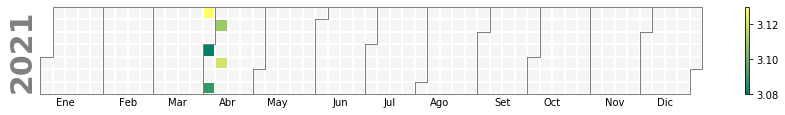

In [4]:
# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python

hoy = datetime.datetime.now()
#print(now.strftime("%Y-%m-%d %H:%M:%S"))
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']
dias_es = ['L','Ma','Mi','J','V','S','D']
calplot.calplot(distances, yearascending=0, cmap='summer',
                monthlabels=meses, dayticks=False,
#                suptitle="distribución de km, 2021 [actualizado "+hoy.strftime("%Y-%m-%d")+"]"
               )